In [1]:
from scipy.stats import t

# Set the t-value and degrees of freedom
t_value = -5.25
df = 58

# Calculate the CDF
cdf_value = t.cdf(t_value,df)
print(cdf_value*2)

2.2563697469332277e-06


In [2]:
# The Shapiro-Wilk test returns two values: the test statistic (W) and the p-value. 
# If the p-value is greater than your chosen significance level (α = 0.05), 
# you can assume the data comes from a normally distributed population. 
# If the p-value is less than or equal to the significance level, the normality assumption is not met, 
# and you should consider applying a data transformation or using a non-parametric test like the Mann-Whitney U test.

from scipy.stats import shapiro

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

# Perform the Shapiro-Wilk test for both desktop and mobile users
shapiro_desktop = shapiro(desktop_users)
shapiro_mobile = shapiro(mobile_users)

print('Shapiro-Wilk test for desktop users',shapiro_desktop)
print('Shapiro-Wilk test for mobile users',shapiro_mobile)

Shapiro-Wilk test for desktop users ShapiroResult(statistic=0.9783115512411948, pvalue=0.77910032998089)
Shapiro-Wilk test for mobile users ShapiroResult(statistic=0.9714355768676654, pvalue=0.5791606602037616)


In [3]:
# If the p-value from Levene's test is greater than your chosen significance level (α = 0.05), you can assume equal variances
#  If the p-value is less than or equal to the significance level, the assumption of equal variances is not met, 
# and you should consider using Welch's t-test instead of the regular independent two-sample t-test.

from scipy.stats import levene

# Input the data as lists
desktop_users = [12, 15, 18, 16, 20, 17, 14, 22, 19, 21, 23, 18, 25, 17, 16, 24, 20, 19, 22, 18, 15, 14, 23, 16, 12, 21, 19, 17, 20, 14]
mobile_users = [10, 12, 14, 13, 16, 15, 11, 17, 14, 16, 18, 14, 20, 15, 14, 19, 16, 15, 17, 14, 12, 11, 18, 15, 10, 16, 15, 13, 16, 11]

#Perform levenes tests
levene_test = levene(desktop_users,mobile_users)
print(levene_test)

LeveneResult(statistic=2.94395488191752, pvalue=0.09153720526741738)


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

before = np.array([80, 92, 75, 68, 85, 78, 73, 90, 70, 88, 76, 84, 82, 77, 91])
after = np.array([78, 93, 81, 67, 88, 76, 74, 91, 69, 88, 77, 81, 80, 79, 88])

In [5]:
differences = after - before

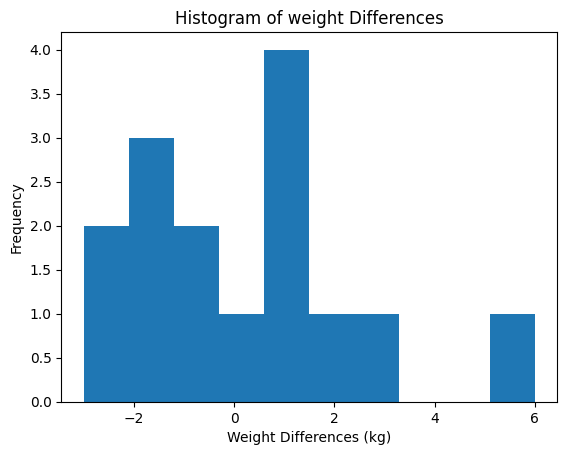

Shapiro-Wilk test: ShapiroResult(statistic=0.9220571486009436, pvalue=0.2070477898690057)


In [6]:
plt.hist(differences)
plt.title('Histogram of weight Differences')
plt.xlabel('Weight Differences (kg)')
plt.ylabel('Frequency')
plt.show()

shapiro_test = stats.shapiro(differences)
print('Shapiro-Wilk test:',shapiro_test)

In [7]:
mean_diff = np.mean(differences)
std_diff = np.std(differences,ddof=1)


In [8]:
n = len(differences)
t_statistic = mean_diff/(std_diff/np.sqrt(n))
df = n - 1

In [9]:
t_statistic

0.10482848367219182

In [10]:
alpha = 0.05
p_value = stats.t.cdf(t_statistic,df)

In [11]:
p_value

0.5410005146857456